### Part A: Data Preprocessing

##### Step 1: Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### Step 2: Importing dataset

In [4]:
dataset = pd.read_csv('Salary_Data.csv')
dataset

,Experience in years,Employee Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


##### Step 3: Creating feature vector and DVV

In [5]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [6]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [7]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

##### Step 4: Replacing missing data

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X[:,:])
X[:,:] = imputer.transform(X[:,:])

In [9]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

##### Step 5: Encoding(Not Required)

##### Step 6: Splitting of dataset into training and testing

In [10]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=1)

In [11]:
Xtest

array([[5.3],
       [7.1],
       [3.9],
       [6. ],
       [4.5],
       [6.8]])

In [12]:
Xtrain

array([[ 9.5],
       [ 2. ],
       [ 8.7],
       [ 7.9],
       [ 8.2],
       [ 2.2],
       [ 1.5],
       [ 9. ],
       [ 3. ],
       [ 5.9],
       [ 4.1],
       [ 3.2],
       [ 9.6],
       [ 1.3],
       [ 5.1],
       [ 1.1],
       [ 4.9],
       [10.5],
       [10.3],
       [ 3.7],
       [ 3.2],
       [ 4. ],
       [ 4. ],
       [ 2.9]])

##### Step 7: Feature Scaling(Not Required)

### Part B: Building linear model

##### Step 1: Training the linear model

In [13]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(Xtrain,Ytrain)

LinearRegression()

##### Step 2: Testing the linear model

In [14]:
Yestimate = LR.predict(Xtest)

In [15]:
Yestimate

array([75074.50510972, 91873.8056381 , 62008.38247653, 81607.56642631,
       67608.14931932, 89073.92221671])

In [16]:
Ytest

array([83088, 98273, 63218, 93940, 61111, 91738], dtype=int64)

##### Step 3: Visualizing the data

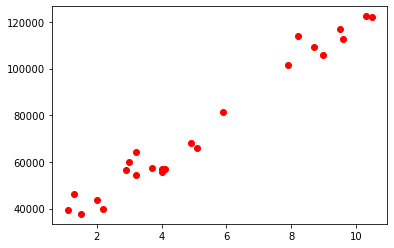

In [17]:
plt.scatter(Xtrain,Ytrain,color='red')

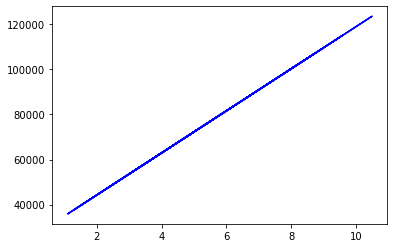

In [18]:
plt.plot(Xtrain,LR.predict(Xtrain),color='blue')

Text(0.5, 1.0, 'Plotting for training dataset')

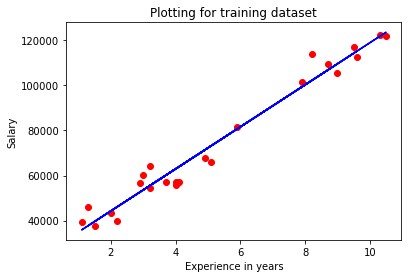

In [19]:
plt.scatter(Xtrain,Ytrain,color='red')
plt.plot(Xtrain,LR.predict(Xtrain),color='blue')
plt.xlabel('Experience in years')
plt.ylabel('Salary')
plt.title('Plotting for training dataset')

Text(0.5, 1.0, 'Plotting for testing dataset')

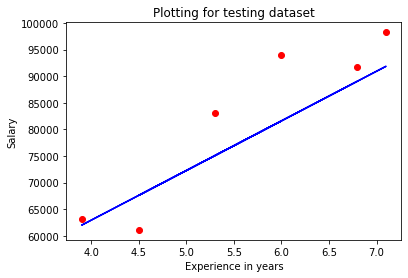

In [20]:
plt.scatter(Xtest,Ytest,color='red')
plt.plot(Xtest,LR.predict(Xtest),color='blue')
plt.xlabel('Experience in years')
plt.ylabel('Salary')
plt.title('Plotting for testing dataset')

In [21]:
LR.coef_

array([9332.94473799])

In [22]:
LR.intercept_

25609.897998354834

###### For 5 years experience of the employee, find the salary of the employee.

In [23]:
print(LR.predict([[5]]))

[72274.62168832]
